# Melanoma Skin Cancer Detection

In [9]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from melanoma_detection.models import MelanomaNetwork, ResNet
from melanoma_detection.utils.metrics_utils import plot_metrics, compute_metrics
from melanoma_detection.preprocess_dataset import create_test_dataset, create_train_dataset, MelanomaDataset
from melanoma_detection.transforms import AdjustSharpness, MelanomaMaskTransform
from melanoma_detection.utils.img_utils import plot_image
from melanoma_detection.models.base import StoppingCriteria
import torch
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.optim as optim

In [16]:
# Constants
BATCH_SIZE = 32
EPOCHS = 20

# Imagenet normalization values
MEAN = [0.485, 0.456, 0.406]
STD = [0.229, 0.224, 0.225]

SEED = 23
torch.manual_seed(SEED)

In [11]:
# Transforms to be applied to data loaders
transform_train = transforms.Compose(
    [
        MelanomaMaskTransform(),
        transforms.Resize((224, 224)),  # Resize the image to 224x224 pixels
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.RandomRotation(20),
        AdjustSharpness(3),
        transforms.ToTensor(),
        transforms.Normalize(MEAN, STD),
    ]
)

transform_validation = transforms.Compose(
    [
        transforms.Resize((224, 224)),  # Resize the image to 224x224 pixels
        MelanomaMaskTransform(),
        transforms.ToTensor(),
        transforms.Normalize(MEAN, STD),
    ]
)

In [12]:
train_loader = DataLoader(
    MelanomaDataset(create_train_dataset(), transform=transform_train),
    BATCH_SIZE,
    shuffle=True,
    num_workers=10,
)

test_loader = DataLoader(
    MelanomaDataset(create_test_dataset(), transform=transform_validation),
    BATCH_SIZE,
    shuffle=False,
    num_workers=10,
)

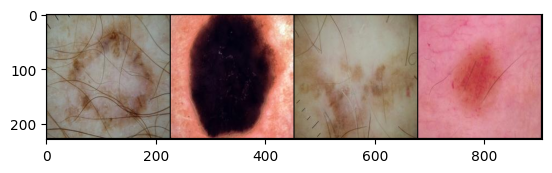

1.0 1.0 1.0 0.0


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


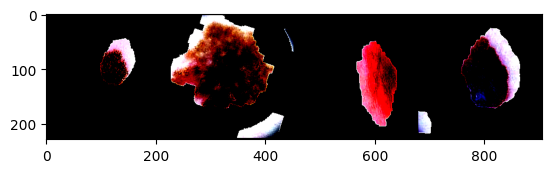

0.0 1.0 0.0 1.0


In [19]:
sample_data = DataLoader(
    MelanomaDataset(create_train_dataset(), transform=transforms.Compose(
        [
            transforms.Resize((224, 224)),  # Resize the image to 224x224 pixels
            transforms.ToTensor(),
        ])),
    4,
    shuffle=True,
    num_workers=10,
)

torch.manual_seed(SEED)

sample_data_w_tf = DataLoader(
    MelanomaDataset(create_train_dataset(), transform=transform_train),
    4,
    shuffle=True,
    num_workers=10,
)


# get some random training images
dataiter = iter(sample_data)
images, labels = dataiter.__next__()

plot_image(torchvision.utils.make_grid(images))
print(' '.join(f'{labels[j]}' for j in range(4)))

dataiter = iter(sample_data_w_tf)
images, labels = dataiter.__next__()

plot_image(torchvision.utils.make_grid(images))
print(' '.join(f'{labels[j]}' for j in range(4)))

Validation: 100%|██████████| 63/63 [00:02<00:00, 29.56it/s]


Validation Loss: 0.523180, Accuracy: 70.40%
Epoch [1/20] - Train Loss: 0.706849, Train Accuracy: 74.96%, Val Loss: 0.523180, Val Accuracy: 70.40%, Val Metrics: {'accuracy': 0.704, 'precision': 0.8953488372093024, 'recall': 0.462, 'f1_score': 0.6094986807387863, 'auc': 0.704}


Validation: 100%|██████████| 63/63 [00:02<00:00, 29.58it/s]


Validation Loss: 0.419858, Accuracy: 78.65%
Epoch [2/20] - Train Loss: 0.528285, Train Accuracy: 81.50%, Val Loss: 0.419858, Val Accuracy: 78.65%, Val Metrics: {'accuracy': 0.7865, 'precision': 0.8774703557312253, 'recall': 0.666, 'f1_score': 0.7572484366117112, 'auc': 0.7865}


Validation: 100%|██████████| 63/63 [00:02<00:00, 30.66it/s]


Validation Loss: 0.411620, Accuracy: 78.80%
Epoch [3/20] - Train Loss: 0.482704, Train Accuracy: 82.45%, Val Loss: 0.411620, Val Accuracy: 78.80%, Val Metrics: {'accuracy': 0.788, 'precision': 0.9403669724770642, 'recall': 0.615, 'f1_score': 0.7436517533252721, 'auc': 0.7879999999999999}


Validation: 100%|██████████| 63/63 [00:02<00:00, 30.59it/s]


Validation Loss: 0.351056, Accuracy: 86.35%
Epoch [4/20] - Train Loss: 0.456091, Train Accuracy: 83.53%, Val Loss: 0.351056, Val Accuracy: 86.35%, Val Metrics: {'accuracy': 0.8635, 'precision': 0.8735868448098664, 'recall': 0.85, 'f1_score': 0.8616320324379118, 'auc': 0.8635}


Validation: 100%|██████████| 63/63 [00:02<00:00, 30.40it/s]


Validation Loss: 0.425806, Accuracy: 79.25%
Epoch [5/20] - Train Loss: 0.439271, Train Accuracy: 83.90%, Val Loss: 0.425806, Val Accuracy: 79.25%, Val Metrics: {'accuracy': 0.7925, 'precision': 0.8843626806833115, 'recall': 0.673, 'f1_score': 0.7643384440658717, 'auc': 0.7925}


Validation: 100%|██████████| 63/63 [00:01<00:00, 31.58it/s]


Validation Loss: 0.430559, Accuracy: 77.60%
Epoch [6/20] - Train Loss: 0.427262, Train Accuracy: 84.26%, Val Loss: 0.430559, Val Accuracy: 77.60%, Val Metrics: {'accuracy': 0.776, 'precision': 0.9181818181818182, 'recall': 0.606, 'f1_score': 0.7301204819277108, 'auc': 0.7759999999999999}


Validation: 100%|██████████| 63/63 [00:02<00:00, 30.17it/s]


Validation Loss: 0.340459, Accuracy: 85.15%
Epoch [7/20] - Train Loss: 0.414562, Train Accuracy: 85.03%, Val Loss: 0.340459, Val Accuracy: 85.15%, Val Metrics: {'accuracy': 0.8515, 'precision': 0.88, 'recall': 0.814, 'f1_score': 0.8457142857142858, 'auc': 0.8515}


Validation: 100%|██████████| 63/63 [00:02<00:00, 29.73it/s]


Validation Loss: 0.367500, Accuracy: 83.60%
Epoch [8/20] - Train Loss: 0.405658, Train Accuracy: 84.82%, Val Loss: 0.367500, Val Accuracy: 83.60%, Val Metrics: {'accuracy': 0.836, 'precision': 0.92, 'recall': 0.736, 'f1_score': 0.8177777777777778, 'auc': 0.836}


Validation: 100%|██████████| 63/63 [00:02<00:00, 30.32it/s]


Validation Loss: 0.301175, Accuracy: 89.00%
Epoch [9/20] - Train Loss: 0.397397, Train Accuracy: 85.53%, Val Loss: 0.301175, Val Accuracy: 89.00%, Val Metrics: {'accuracy': 0.89, 'precision': 0.9004106776180698, 'recall': 0.877, 'f1_score': 0.8885511651469098, 'auc': 0.89}


Validation: 100%|██████████| 63/63 [00:02<00:00, 30.01it/s]


Validation Loss: 0.341643, Accuracy: 86.35%
Epoch [10/20] - Train Loss: 0.395796, Train Accuracy: 85.77%, Val Loss: 0.341643, Val Accuracy: 86.35%, Val Metrics: {'accuracy': 0.8635, 'precision': 0.939540507859734, 'recall': 0.777, 'f1_score': 0.8505747126436781, 'auc': 0.8635}


Validation: 100%|██████████| 63/63 [00:02<00:00, 29.97it/s]


Validation Loss: 0.391463, Accuracy: 82.40%
Epoch [11/20] - Train Loss: 0.391128, Train Accuracy: 85.63%, Val Loss: 0.391463, Val Accuracy: 82.40%, Val Metrics: {'accuracy': 0.824, 'precision': 0.921875, 'recall': 0.708, 'f1_score': 0.8009049773755657, 'auc': 0.824}


Validation: 100%|██████████| 63/63 [00:02<00:00, 28.75it/s]


Validation Loss: 0.312351, Accuracy: 86.40%
Epoch [12/20] - Train Loss: 0.386704, Train Accuracy: 86.08%, Val Loss: 0.312351, Val Accuracy: 86.40%, Val Metrics: {'accuracy': 0.864, 'precision': 0.9099099099099099, 'recall': 0.808, 'f1_score': 0.8559322033898306, 'auc': 0.8640000000000001}
Early stopping triggered.


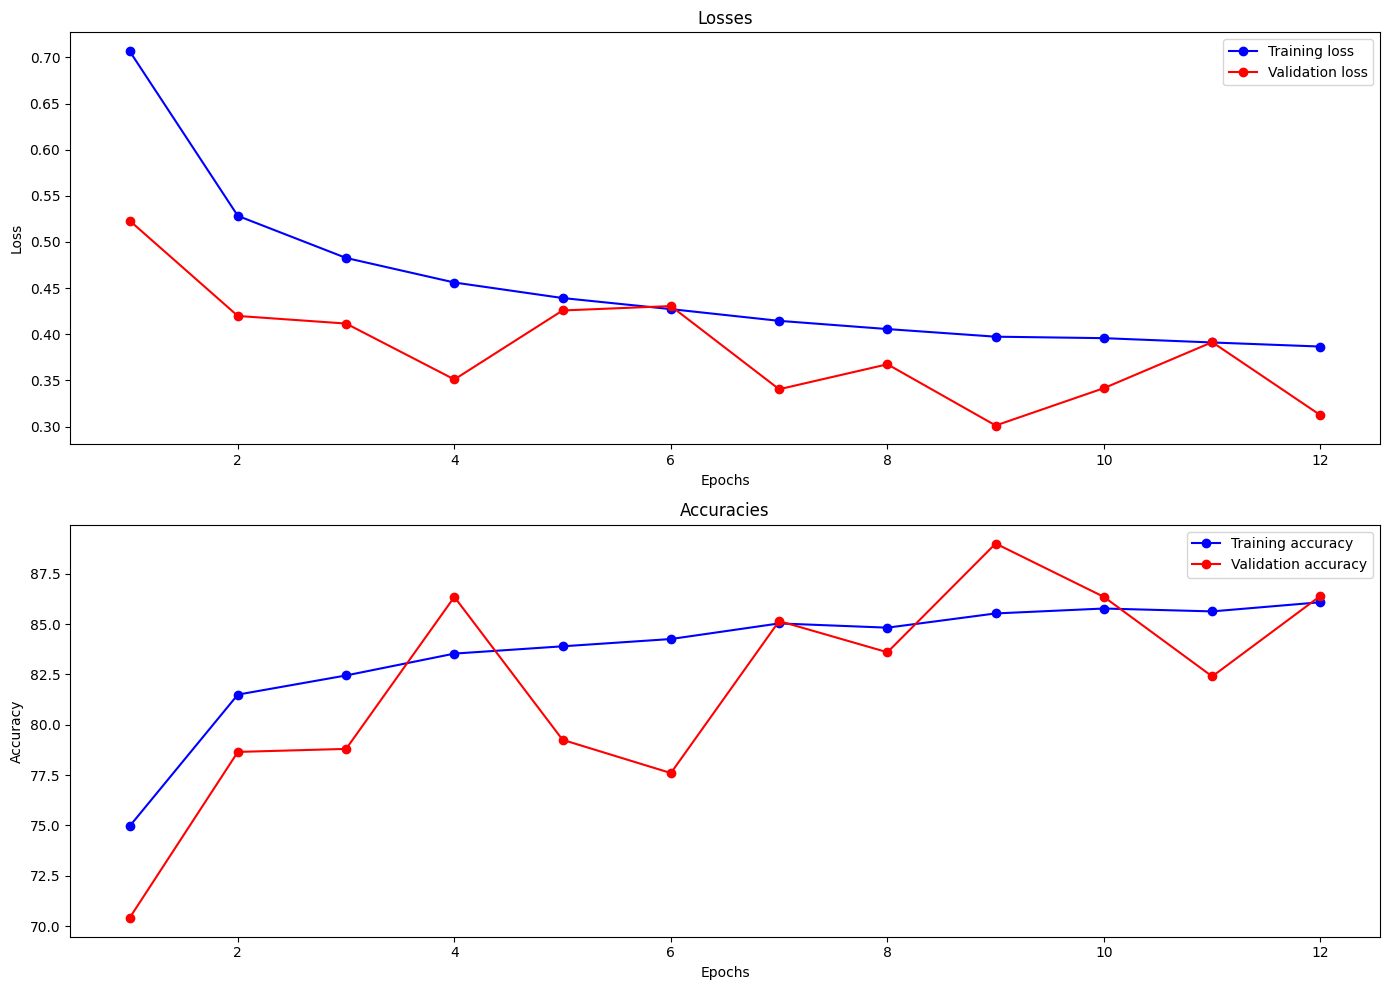

Validation Metrics:
accuracy: 0.8640
precision: 0.9099
recall: 0.8080
f1_score: 0.8559
auc: 0.8640


In [14]:
net = MelanomaNetwork()

criterion = torch.nn.BCEWithLogitsLoss()

optimizer = optim.Adam(
    net.parameters(),
    # lr=6.051040788116986e-05,
    # betas=(0.8362066397681903, 0.9907655800812818),
    # weight_decay=3.6250408963045035e-10,
    lr=0.0002288372831567034,
    betas=(0.8378331684737104, 0.9034144582679383),
    weight_decay=3.358130934902445e-09,
)

net.fit(
    train_loader,
    test_loader,
    EPOCHS,
    optimizer,
    criterion,
    StoppingCriteria(3),
    True,
)

PATH = "./best_model"
net.save(PATH)

In [15]:
net = MelanomaNetwork()

criterion = torch.nn.BCEWithLogitsLoss()
net.load("best_model")
net.validate(test_loader, criterion)

net.load("best_model_custom.pth")
net.validate(test_loader, criterion)

net = ResNet()
net.load("best_model_resnet.pth")
net.validate(test_loader, criterion)

Validation: 100%|██████████| 63/63 [00:02<00:00, 30.38it/s]


Validation Loss: 0.301175, Accuracy: 89.00%


Validation: 100%|██████████| 63/63 [00:02<00:00, 30.96it/s]


Validation Loss: 2.840193, Accuracy: 50.15%


Validation: 100%|██████████| 63/63 [00:05<00:00, 11.66it/s]

Validation Loss: 0.559042, Accuracy: 64.75%


(0.5590423673006987,
 64.75,
 {'accuracy': 0.6475,
  'precision': 0.5878499106611078,
  'recall': 0.987,
  'f1_score': 0.7368421052631579,
  'auc': 0.6475})